In [ ]:
## Exercise 1
# This is known as clustering

In [ ]:
## Exercise 2
# This would be supervised learning because it requires two desired outputs to be chosen, spam or not spam. Unlike unsupervised learning, it
# would also require some input on what is spam and what isn't.

In [ ]:
## Exercise 3
# A test set is gathered from the model to determine the overall affectiveness of the product.

In [ ]:
## Exercise 4
# E.)

In [84]:
## Exercise 5
## a.)
# Importing the csv file
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

s3= boto3.resource('s3')
bucket_name= 'macklins-bucket'
bucket= s3.Bucket(bucket_name)

file_key= 'Real_Estate.csv'

bucket_object= bucket.Object(file_key)
file_object= bucket_object.get()
file_content_stream= file_object.get('Body')

## Reading the data file
house_price= pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [85]:
## b.)
# dropping the no and transaction_date columns
house_price= house_price.drop(columns= ['No', 'transaction_date'], axis= 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [86]:
## c.)
# creating the two data-frames
from sklearn.model_selection import train_test_split

# Definning the inputs and target variable
X = house_price.drop(columns = 'house_price_of_unit_area', axis =1) 
Y = house_price['house_price_of_unit_area']
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [87]:
## d.)
# Building the model
from sklearn.linear_model import LinearRegression

lm_md= LinearRegression().fit(X_train, Y_train)

In [88]:
# Predicting on test
lm_pred= lm_md.predict(X_test)
lm_pred

array([39.9713406 , 33.06663401, 49.84696444, 46.07460729, 43.331511  ,
       40.66070954, 31.99041035, 12.56417269, 37.2005602 , 36.78561421,
       38.38262678, 45.39769394, 31.07690585, 31.46811622, 13.00430083,
       13.99561824, 38.89604241, 45.96755415, 34.03765278, 42.05981671,
       39.48092292, 35.20080388, 46.21373662, 50.20434265, 32.82375191,
       39.9407068 , 38.56929957, 41.36928451, 46.19544467, 13.69671996,
       50.00754416, 39.14951673, 45.4779838 , 30.68476505, 25.9622308 ,
       38.30233693, 37.10053427, 53.10894163, 32.07123237, 46.63908756,
       39.80689038, 30.03065189, 29.48301948, 45.95669226, 33.45868157,
       40.32139088,  7.7460729 , 46.95862085, 33.07517389, 38.36212567,
       45.95669226, 39.07715368, 23.54557852,  1.52883809, 35.28772247,
       13.55988108, 48.85627755, 29.82833992,  6.78013587, 23.65263166,
       47.11920056, 53.08217835, 46.02370852, 43.17090332, 46.51483193,
       43.04022435, 32.42292727, 41.899237  , 41.7969386 , 44.02

In [89]:
# Reporting the mse
np.mean((Y_test-lm_pred)**2)

126.21600394067788

In [90]:
## e.)
# Building the new model
from sklearn.model_selection import train_test_split

# Definning the inputs and target variable
X2 = house_price[['house_age', 'number_of_convenience_stores', 'latitude', 'longitude']]
Y2 = house_price['house_price_of_unit_area']
# Splitting the data
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size = 0.2)


# Building the model
from sklearn.linear_model import LinearRegression

lm_md2= LinearRegression().fit(X2_train, Y2_train)

# Making the predictions
lm_pred2= lm_md2.predict(X2_test)
lm_pred2

array([49.96096484, 31.44947603, 32.72218232, 35.32811126, 46.9661762 ,
       53.08621983, 35.96823892, 46.15786962, 39.91409474, 42.30761313,
       31.56895155, 49.32495232, 29.14560828, 31.32741826, 37.28424563,
       48.64723072, 38.1949742 , 47.66469577, 50.37783012, 34.06873484,
       36.55369843, 52.26760001, 37.62094845, 34.85124876, 48.47011017,
       34.52732202, 30.78170648, 13.11655278, 50.06278676, 30.9588903 ,
       26.12760298, 52.90325113, 39.77124612, 39.78454948, 41.587369  ,
       29.05643971, 46.54711487, 42.4864927 , 14.6137628 , 55.90474673,
       41.81295783, 46.1432968 , 39.71180041, 48.97174643, 16.1258673 ,
       15.90621139, 44.01799273, 43.97061345, 43.84835751, 41.76261448,
       45.31524738, 44.27068023, 49.60719013, 47.25854954, 30.06690362,
       16.8751846 , 28.5206422 , 42.60538412, 33.45126199, 51.88483182,
       17.78125607, 41.48991512, 42.43283481, 48.38139784, 48.63247105,
       14.67885131, 44.94343832, 39.79520332, 52.14870859, 34.25

In [91]:
# Reporting the mse
np.mean((Y2_test-lm_pred2)**2)

94.25335500301165

In [ ]:
## f.)
# The mse of a model reports the overall accuracy of a model, with the number closest to zero being
# the more accurate model. This means that the model from part d is more accurate and is the one
# I would rather have.

In [94]:
## g.)
# creating the list to store the results
mse1= list()
mse2= list()

for i in range (0,100):
    
    # Model 1
    # Definning the input and target variables
    x1= house_price.drop(columns= 'house_price_of_unit_area', axis= 1)
    y1= house_price['house_price_of_unit_area']
    
    # Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, test_size = 0.2)
    
    # Linear Model
    lm_md1= LinearRegression().fit(X_train, Y_train)
    
    # Making the predictions on test
    lm_md1_pred= lm_md1.predict(X_test)
    mse1.append(np.mean(Y_test - lm_md1_pred)**2)
    
   
   #Model 2 
    
    from sklearn.model_selection import train_test_split

    # Definning the inputs and target variable
    X22 = house_price[['house_age', 'number_of_convenience_stores', 'latitude', 'longitude']]
    Y22 = house_price['house_price_of_unit_area']
    # Splitting the data
    X22_train, X22_test, Y22_train, Y22_test = train_test_split(X22,Y22, test_size = 0.2)


    # Building the model
    from sklearn.linear_model import LinearRegression

    lm_md22= LinearRegression().fit(X22_train, Y22_train)

    # Making the predictions
    lm_pred22= lm_md22.predict(X2_test)
    mse2.append(np.mean(Y22_test-lm_pred22))

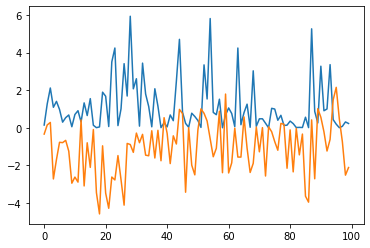

In [95]:
## g.)
import matplotlib.pyplot as plt 

# index= np.linspace(0,100)

plt.plot([i for i in range(0, 100)], mse1)
plt.plot([i for i in range(0, 100)], mse2)
plt.show()

In [ ]:
# I would rather have the blue model because the mse is closer to zero.